# Project Tumor Trace: MRI-Based AI for Breast Cancer Detection

## Business Understanding

- **Objective:** Describe the primary goal of the project, which is to develop an AI model to detect breast cancer in MRI scans.

- **Project Goals:**

> Build a binary classifier to distinguish between malignant and benign breast tumors.



## Data Understanding

### Loading the dataset

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import cv2


# Define the path to your dataset
data_dir = r"D:\breastcancer"

# Check the directory structure
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Print the classes available in the train directory
print("Classes in training set:")
print(os.listdir(train_dir))

print("\nClasses in val set:")
print(os.listdir(val_dir))

print("\nClasses in test set:")
print(os.listdir(test_dir))

Classes in training set:
['Benign', 'Malignant']

Classes in val set:
['Benign', 'Malignant']

Classes in test set:
['Benign', 'Malignant']


### Anaylzing the dataset

#### Counting images in each class directory

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def count_images(directory):
   
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in the training set
train_class_counts = count_images(train_dir)
print("Number of images in each class (train):", train_class_counts)


Number of images in each class (train): {'Benign': 61, 'Malignant': 105}


#### Displaying sample images from a given directory

Sample images from the 'Benign' class


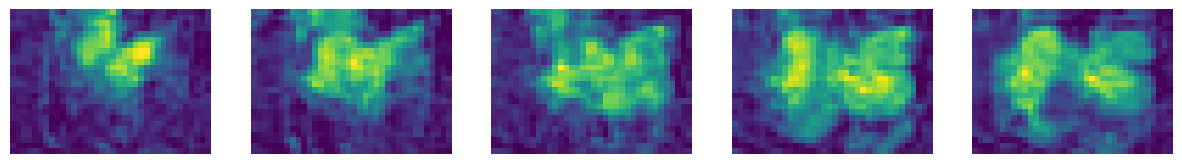

Sample images from the 'Malignant' class


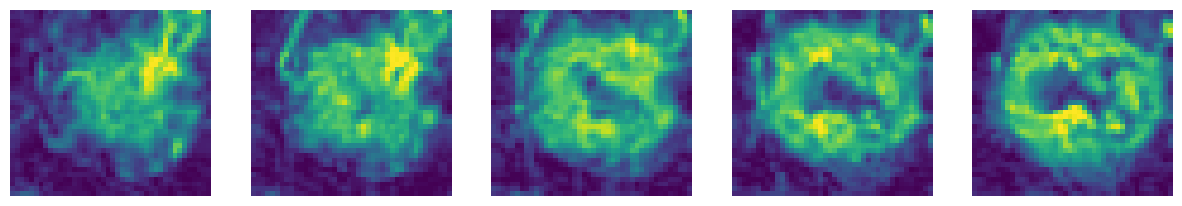

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Displayingg sample images from a given directory
def show_sample_images(class_dir, num_images=5):
    
    class_images = os.listdir(class_dir)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(class_images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


# Defining the train\Benign\BreaDM-Be-1801 directory 
benign_images = r"D:\breastcancer\train\Benign\BreaDM-Be-1801"
img_dir = os.path.join(benign_images, 'SUB1')

malignant_images = r"D:\breastcancer\train\Malignant\BreaDM-Ma-1802"
img_dir = os.path.join(benign_images, 'SUB2')

# Showing sample images from the 'Benign' class
print("Sample images from the 'Benign' class")
show_sample_images(os.path.join(benign_images, 'SUB1'))


# Showing sample images from the 'Maligant' class
print("Sample images from the 'Malignant' class")
show_sample_images(os.path.join(malignant_images, 'SUB2'))




## Data Preparation


### Data Transformation

In [4]:
import torchvision.transforms as transforms
import torch

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to 224x224 pixels
    transforms.ToTensor(),  # Converting to PyTorch tensor

    # Normalization- process of scaling pixel intensity values to a common range
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet values
])


#### Visualizing the transform img

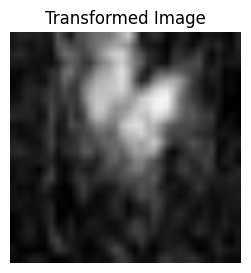

In [5]:
# Function to visualize the transformed image
def show_transformed_image(img_path):
    # Open the image
    image = Image.open(img_path)

    # Convert the image to RGB if it’s in a different mode
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Apply the transformations
    transformed_image = transform(image)
    
    # Convert back to numpy for visualization
    img = transformed_image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
    
    # Unnormalize the image for visualization
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0, 1)  # Clamp the values to [0, 1]

    # Plot the image
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.title("Transformed Image")
    plt.axis('off')
    plt.show()

# Example image 
example_image_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1801\SUB1\p-032.jpg"
show_transformed_image(example_image_path)

### Data Augmentation

In [6]:
# Define data augmentation with additional techniques
augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Random rotation
    transforms.RandomCrop(224, padding=4),  # Random crop with padding
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomGrayscale(p=0.1),  # Randomly convert image to grayscale with a probability of 0.1
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Random perspective transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#### Visualizing the Augmentated image

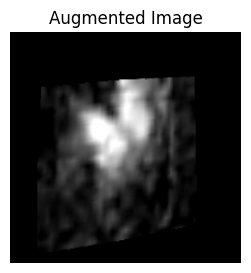

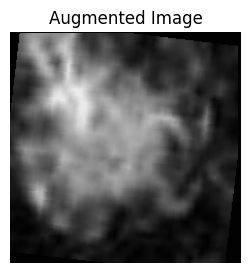

In [7]:
# Function to visualize the augmented image
def show_augmented_image(img_path):
    # Open the image
    image = Image.open(img_path)

    # Converting the image to RGB if it’s in a different mode
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Applying the augmentation transformations
    augmented_image = augmentation_transforms(image)

    # Convert back to numpy for visualization
    img = augmented_image.permute(1, 2, 0)  # Change from (Channels, Height, Width) to (Height, Width, Channels)

    # Unnormalize the image for visualization
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0, 1)  # Clamp the values to [0, 1]

    # Plot the image
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.title("Augmented Image")
    plt.axis('off')
    plt.show()

# Example image paths for Benign and Malignant classes
benign_example_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1801\SUB1\p-032.jpg"
malignant_example_path = r"D:\breastcancer\train\Malignant\BreaDM-Ma-1802\SUB2\p-035.jpg"

# Show augmented images
show_augmented_image(benign_example_path)
show_augmented_image(malignant_example_path)

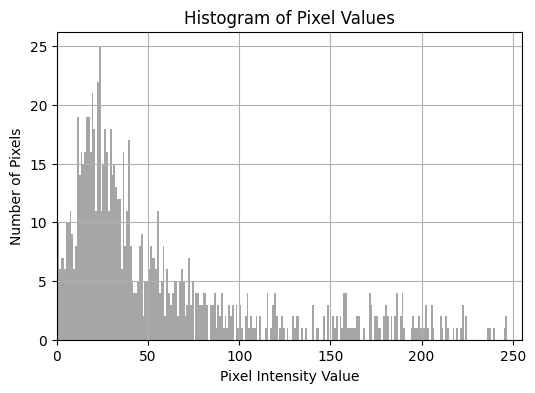

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"D:/breastcancer/train/Benign/BreaDM-Be-1801/SUB1/p-032.jpg")

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Flatten the image array to get pixel values
pixel_values = image_gray.flatten()

# Plot the histogram of pixel values
plt.figure(figsize=(6, 4))
plt.hist(pixel_values, bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Number of Pixels')
plt.xlim(0, 255)  # For 8-bit grayscale images
plt.grid()
plt.show()


### Setting up dataloaders

#### Creating Dataset with updated transformation

In [8]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(root=train_dir, transform=augmentation_transforms)  # Use augmentation for training
val_dataset = ImageFolder(root=val_dir, transform=transforms)  # Use normalization for validation
test_dataset = ImageFolder(root=test_dir, transform=transforms)  # Use normalization for testing


#### Creating DataLoader

In [9]:
# Creating dataloaders
batch_size = 32  # Define batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Check the size of each dataset
print(f'Training set size: {len(train_loader.dataset)}')
print(f'Validation set size: {len(val_loader.dataset)}')
print(f'Test set size: {len(test_loader.dataset)}')


Training set size: 20434
Validation set size: 1989
Test set size: 6851


#### Example of Data transformation on single img

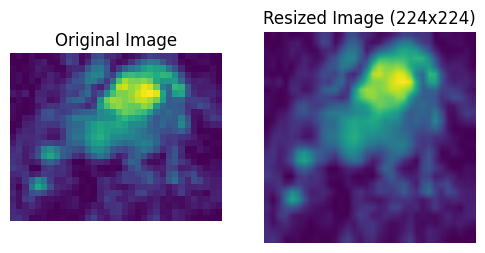

In [10]:
# Definingg the path to your image
img_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1805\SUB2\p-033.jpg" 

# Load the image
image = Image.open(img_path)

# Defining the transformation
resize_transform = transforms.Resize((224, 224))

# Apply the transformation
resized_image = resize_transform(image)

# Visualizingg the original and resized images
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Resized Image (224x224)')
plt.imshow(resized_image)
plt.axis('off')

plt.show() 

## Feature Extraction technique

# Histogram of Oriented Gradients (HOG)

- HOG is a feature descriptor in computer vision that is widely used for object detection.

- captures appearance and shape information of an object by counting the occurrences of gradient orientations in localized regions of an image.

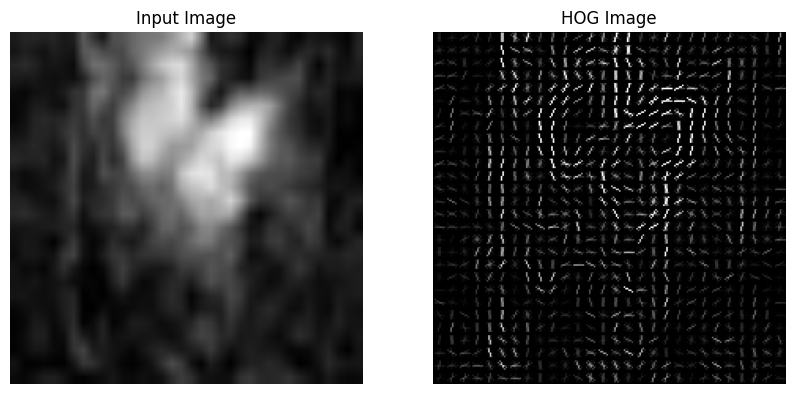

In [16]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:/breastcancer/train/Benign/BreaDM-Be-1801/SUB1/p-032.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resizing the image to 224x224
resized_image = cv2.resize(image, (224, 224))

hog_features, hog_image = hog(
    resized_image, 
    pixels_per_cell=(8, 8), 
    cells_per_block=(2, 2), 
    visualize=True, 
    feature_vector=True, 
    block_norm='L2-Hys'
)

# Rescaling histogram 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the HOG image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(resized_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('HOG Image')
plt.imshow(hog_image_rescaled, cmap='gray')

plt.show()

## Sobel Operator
- Operator is used to find the edges in an image by specifying regions where there is a significant change in intensity (brightness).
- It works by calculating the gradient (rate of change) of the image intensity at each pixel.


In [11]:
import numpy as np

# 3x3 matrix representing a simple image.
image = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# 2x2 matrix used for convolution,helpingg to detect patterns in the image.
kernel = np.array([
    [1, 0],
    [0, -1]
])

# Function to perform convolution on the input image with the given kernel.
def convolve(image, kernel):
    image_x, image_y = image.shape # dimensions (height and width) of the image.
    kernel_x, kernel_y = kernel.shape # dimensions of the kernel

    # Kernel radius
    height_radius, width_radius = np.array(kernel.shape) // 2
    
    # Determine the output dimensions
    stride = 1
    padding = 0
    output_x = int(((image_x - kernel_x + 2 * padding) // stride) + 1) 
    output_y = int(((image_y - kernel_y + 2 * padding) // stride) + 1)
    print("\nOutput x dimension:", output_x)
    print("Output y dimension:", output_y)
    
    # Initialize the output feature map
    output = np.zeros((output_x, output_y))
    
    # Perform convolution
    for i in range(output_x):
        for j in range(output_y):
            region = image[i:i + kernel_x, j:j + kernel_y]
            output[i, j] = np.sum(region * kernel)
    
    return output

# Perform convolution
convolved_image = convolve(image, kernel)
print("\nConvolved Image:\n", convolved_image)

# Eg Sobel X operator detecting horizontal edges.
Sobel_x_operator = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Perform convolution with Sobel operator
sobel_convolved_image = convolve(image, Sobel_x_operator)
print("\nSobel X Convolved Image:\n", sobel_convolved_image)



Output x dimension: 2
Output y dimension: 2

Convolved Image:
 [[-4. -4.]
 [-4. -4.]]

Output x dimension: 1
Output y dimension: 1

Sobel X Convolved Image:
 [[8.]]


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


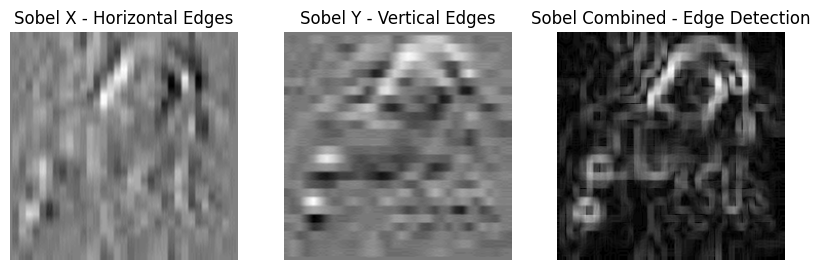

In [12]:
 import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform convolution
def convolve(image, kernel):
    image_x, image_y = image.shape   # dimensions (height and width) of the image.
    kernel_x, kernel_y = kernel.shape # dimensions of the kernel
    print(kernel)

    # Determining the output dimensions
    stride = 1 # step size by which we move the kernel across the image (set to 1 here).
    padding = 0
    output_x = int(((image_x - kernel_x + 2 * padding) // stride) + 1) # dimensions of the output image after applying the kernel. #1
    output_y = int(((image_y - kernel_y + 2 * padding) // stride) + 1) # dimensions of the output image after applying the kernel.#1
    
    # Initialize the output feature map
    output = np.zeros((output_x, output_y)) # matrix initialized to zeros to store the convolution result.
    #initialized to zeros to ensure it starts with a clean slate.

    # Perform convolution in that we  move the kernel over the image.
    for i in range(output_x):
        for j in range(output_y):
            region = image[i:i + kernel_x, j:j + kernel_y]
            output[i, j] = np.sum(region * kernel)

    return output

# Sobel X operator (horizontal edges)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Sobel Y operator (vertical edges)
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Load the image and convert to grayscale
image = resized_image

image = np.array(image)
# Converting the Image to a Numpy Array:

# Apply Sobel X operator
sobel_x_image = convolve(image, sobel_x)

# Apply Sobel Y operator
sobel_y_image = convolve(image, sobel_y)

# Calculate the magnitude of gradients
sobel_combined = np.sqrt(sobel_x_image**2 + sobel_y_image**2)

# Plot the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x_image, cmap='gray')
plt.title('Sobel X - Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y_image, cmap='gray')
plt.title('Sobel Y - Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined - Edge Detection')
plt.axis('off')

plt.show()


## Local Binary Pattern
Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.


- 1. Divide image into cells: For each pixel in a cell, compare it with its neighbors.
- 2. Threshold the neighborss: If the neighbor's value is greater than or equal to center pixel's value, set it to 1; otherwise, set it to 0.
- 3. Generate a binary number: Concatenate all the binary values (0s and 1s) to form a binary number.
- 4. Convert to decimal: Convert the binary number to a decimal value.
- 5. Replace the pixel value: The center pixel is replaced with the decimal value.

### Without using library

In [13]:
import numpy as np
import cv2

def lbp(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows-1):
        
        for j in range(1, cols-1):
            center = gray[i, j]  # i is 1, j is 1, so gray[1, 1] accesses the pixel in the second row and second column. 
            
            binary_str = ''  #initially an empty string.
            binary_str += '1' if gray[i-1, j-1] >= center else '0'   #grey[0,0]
            binary_str += '1' if gray[i-1, j] >= center else '0'    #gray[0, 1]
            binary_str += '1' if gray[i-1, j+1] >= center else '0'   #gray[0, 2]
            binary_str += '1' if gray[i, j+1] >= center else '0'     #gray[1, 2]
            binary_str += '1' if gray[i+1, j+1] >= center else '0'    #gray[2, 2]
            binary_str += '1' if gray[i+1, j] >= center else '0'     #gray[2, 1]
            binary_str += '1' if gray[i+1, j-1] >= center else '0'   #gray[2, 0]
            binary_str += '1' if gray[i, j-1] >= center else '0'     #gray[1, 0]
            
            lbp_image[i, j] = int(binary_str, 2)
    
    return lbp_image

# Load an example image
example_img_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1806\SUB2\p-024.jpg"
image = cv2.imread(example_img_path)

# Resize the image to 224x224
resized_image = cv2.resize(image, (224, 224))

# Apply LBP
lbp_result = lbp(resized_image)

# Display the result
cv2.imshow('LBP', lbp_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


### With Library

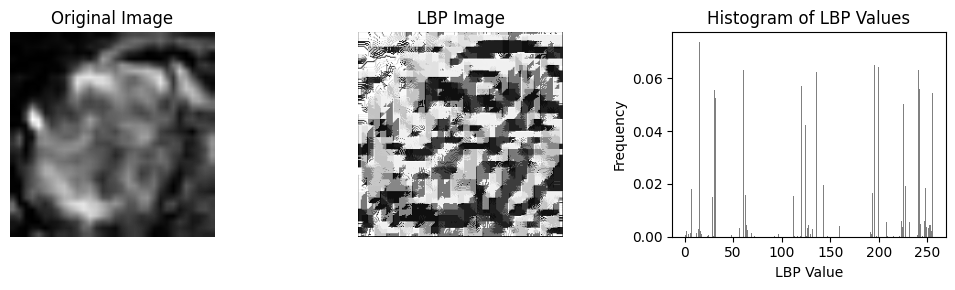

Each element in this array represents the brightness of a pixel, with values typically ranging from 0 (black) to 255 (white).


In [14]:
# Using Libraryy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


def edge_detection(img_path):

    # Load the image in the greyscale modeee
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resizing the image to 224x224
    image = cv2.resize(image, (224, 224))

    # Apply LBP
    radius = 1  # radius of 1 means that the neighbors are directly adjacent to the center pixel.

    n_points = (8 * radius)  # 8 * radius because in a unit circle (radius 1), there are 8 discrete sampling points.

    lbp_image = local_binary_pattern(image, n_points, radius, method="default")

    """Example: 'default'
    
'default': Regular LBP, where each bit of the binary pattern is a direct thresholding result.
'uniform': LBP where patterns with at most two 0-1 or 1-0 transitions are considered uniform. This results in a smaller feature set.
'ror': Rotation-invariant patterns achieved by bitwise rotation.
'var': Rotation-invariant variance measures of the LBP codes.
Purpose: Specifies how to handle the binary patterns, allowing for different levels of robustness and feature reduction."""

    # grid of 1 row and 3 columns
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))

    # Original Image
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    # LBP Image
    ax[1].imshow(lbp_image, cmap="gray")
    ax[1].set_title("LBP Image")
    ax[1].axis("off")

    # Histogram of LBP Values
    n_bins = int(lbp_image.max() + 1)
    ax[2].hist(
        lbp_image.ravel(), bins=n_bins, range=(0, n_bins), density=True, color="gray"
    )
    ax[2].set_title("Histogram of LBP Values")
    ax[2].set_xlabel("LBP Value")
    ax[2].set_ylabel("Frequency")

    # Display the combined visuals
    plt.tight_layout()
    plt.show()


# Example usage
example_img_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1806\SUB2\p-024.jpg"
edge_detection(example_img_path)
print(
    "Each element in this array represents the brightness of a pixel, with values typically ranging from 0 (black) to 255 (white)."
)


## MVM-LBP -  Mean-Variance-Median Local Binary Pattern
- It’s an advanced method for texture description and face recognition.
- Instead of comparing each neighbor to just the center pixel, we compare each neighbor to a threshold that combines the mean, variance, and median of the pixels in the 3x3 window.

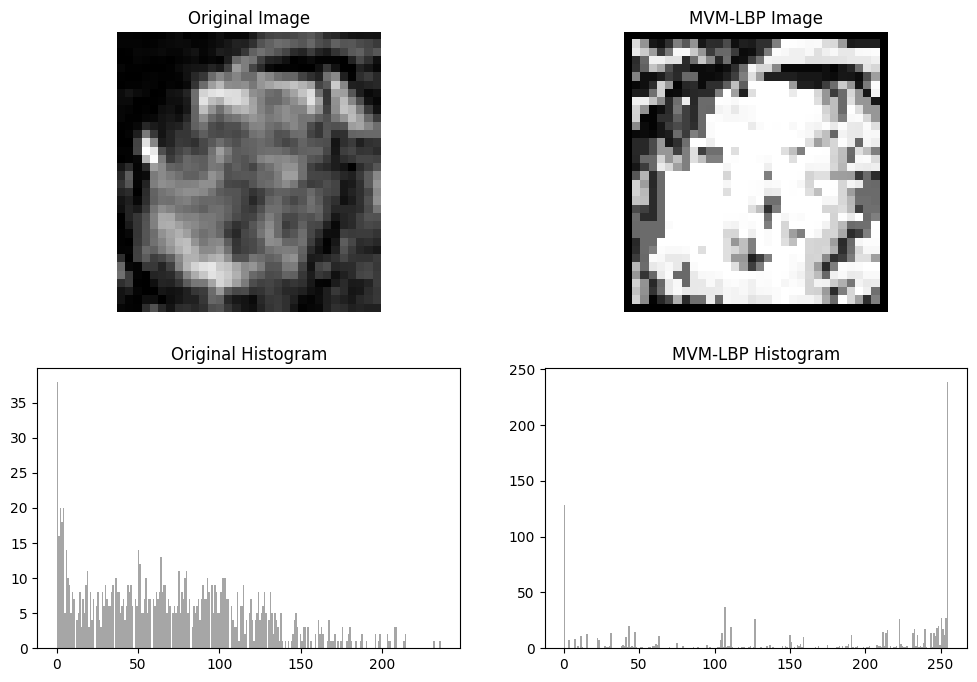

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def calculate_mvm_lbp(image):
    rows, cols = image.shape  # dimensions of the image
    mvm_lbp_image = np.zeros((rows, cols), dtype=np.uint8)  # Initializingg an empty image for MVM-LBP

    for i in range(1, rows - 1):  # Loop over each pixel, excluding the border
        for j in range(1, cols - 1):
            
            # 3x3 window around the center pixel
            window = image[i - 1:i + 2, j - 1:j + 2]

            # mean, variance, and median of the 3x3 window
            mean = np.mean(window) #summ 
            variance = np.var(window)   #Average of the squared differences from the Mean
            median = np.median(window)

            # threhold as the average of mean, square root of variance, and median
            threshold = (mean + np.sqrt(variance) + median) / 3

            #Creating an 8-bit binary pattern based on the threshold
            binary_str = ''.join(['1' if window[x, y] >= threshold else '0'
                                  for x in range(3) for y in range(3) if (x, y) != (1, 1)])  # (excluding the center)
            #binary string to integer and set it as the new pixel value
            mvm_lbp_image[i, j] = int(binary_str, 2)
    
    return mvm_lbp_image


#ploting the images now
def plot_images_and_histograms(original, mvm_lbp_image):
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Plot original image
    ax[0, 0].imshow(original, cmap='gray')
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')

    # Plot MVM-LBP image
    ax[0, 1].imshow(mvm_lbp_image, cmap='gray')
    ax[0, 1].set_title('MVM-LBP Image')
    ax[0, 1].axis('off')

    # Plot histograms
    ax[1, 0].hist(original.ravel(), bins=256, color='gray', alpha=0.7)
    ax[1, 0].set_title('Original Histogram')
    
    ax[1, 1].hist(mvm_lbp_image.ravel(), bins=256, color='gray', alpha=0.7)
    ax[1, 1].set_title('MVM-LBP Histogram')

    plt.show()

# grayscale image and apply MVM-LBP
example_img_path = r"D:\breastcancer\train\Benign\BreaDM-Be-1806\SUB2\p-024.jpg"
image = cv2.imread(example_img_path, cv2.IMREAD_GRAYSCALE)

# Apply MVM-LBP
mvm_lbp_image = calculate_mvm_lbp(image)

# original and MVM-LBP images with histograms
plot_images_and_histograms(image, mvm_lbp_image)